In [2]:
import pandas as pd

dataset_path = '/media/mahfuz/Media/datasets/IMDB_movie_review/imdb_movie_review_dataset/IMDB_Dataset.csv'

In [4]:
data = pd.read_csv(dataset_path)
data.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


### EDA

In [5]:
from sklearn.model_selection import train_test_split 
X, y =data['review'].values, data['sentiment'].values
x_train, x_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [6]:
print(f'Train data shape:, {x_train.shape}')
print(f'Train data shape:, {x_test.shape}')

Train data shape:, (37500,)
Train data shape:, (12500,)


In [7]:
dd = pd.Series(y_train).value_counts()
dd

negative    18750
positive    18750
Name: count, dtype: int64

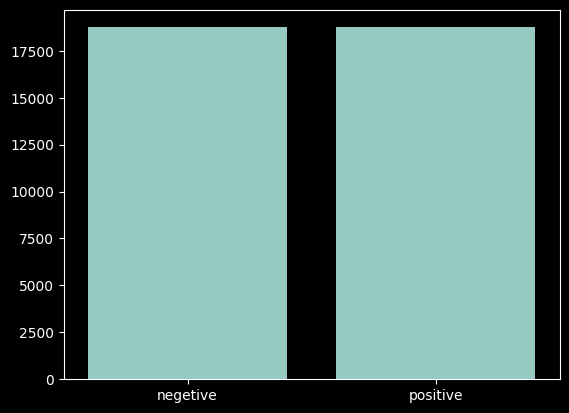

In [8]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.barplot(x=np.array(['negetive','positive']), y=dd.values)
plt.show()

### Text Preprocessing

#### Lower case 

In [12]:
import re
# def preprocess_string(s):
#     # remove all non-word characters (everything except numbers and letters)
#     s = re.sub(r"[^\w\s]", '', s)
#     # remove all runs of whitespace with no space
#     s = re.sub(r"\s+", '', s)
#     # replace digits with no space
#     s = re.sub(r"\d", '', s)
#     return s



# make data lower case 
data['review'][3].lower()
data['review'] = data['review'].str.lower()

#### Remove HTML Tags

In [15]:

import re
def remove_html_tag(text):
    pattern = re.compile('<.*?>')
    return pattern.sub(r"", text)

data['review'] = data['review'].apply(remove_html_tag)
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### Remove URL

In [16]:
def remove_url(text):
    pattern = re.compile(r'http?://\S+|www\.\S+')
    return pattern.sub(r'', text)
data['review'] = data['review'].apply(remove_url)
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production. the filming tec...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically there's a family where a little boy ...,negative
4,"petter mattei's ""love in the time of money"" is...",positive


#### Remove punctuation

In [17]:
import string, time

# check the punctuation list in python
pnc = string.punctuation
print(pnc)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [19]:
# define the puctuation remove function
def remove_punctuation(s):
    for char in pnc:
        s = s.replace(char, '')
    return s
text1 = 'wow! you are doing awsome. and do you need that? really?!'
text1=remove_punctuation(text1)
print(text1)

wow you are doing awsome and do you need that really


In [20]:
# define another puctuation removal function
def remove_puc(s):
    return s.translate(str.maketrans('','',pnc))
st = time.time()
print(st)
data['review'] = data['review'].apply(remove_puc)
time2 = time.time() - st
print(time2)

1717276304.1251814
0.6669342517852783


In [21]:
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production the filming tech...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


#### Spelling correction

In [26]:
from textblob import TextBlob
incorrect_text = 'ceertain conditionas seveal ggenratation aree moodified inn a same mannerss.'
text_blb = TextBlob(incorrect_text)
print(text_blb.correct().string) # correct the sentence

certain conditions several ggenratation are modified inn a same manners.


In [27]:
def spelling_correction(s):
    text_blob = TextBlob(s)
    return text_blob.correct().string
data['review'] = data['review'].apply(spelling_correction)
data[3]

KeyboardInterrupt: 

In [ ]:
data['review']=data['review'].apply(preprocess_string)

In [ ]:
data.head()